## CS/INFO 5304 Assignment 1: Data Preparation <br />


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

### Case 1: Actual screen time


In [2]:
# Read data

individual_path = "Extrasensory_individual_data.p"
sensor_path = "Extrasensory_sensor_data.p"

df = pd.read_pickle(individual_path)
sensor = pd.read_pickle(sensor_path)

In [3]:
print(df.head(1))
# print(sensor_df.keys())

                                   uuid  age gender   system  hours_in_study  \
0  3600D531-0C55-44A7-AE95-A7A38519464E   24   male  Android              86   

   perceived_average_screen_time  actual_average_screen_time  
0                            4.3                        5.18  


In [4]:
## Case 1 Problem A code (and optional graph)
print(df["actual_average_screen_time"][:10])

0    5.18
1    2.31
2   -1.00
3    4.75
4    1.55
5    3.69
6    4.72
7   -1.00
8    3.01
9    3.32
Name: actual_average_screen_time, dtype: float64


#### Writeup Answer to Problem A: 
How are missing values represented for this feature?

ANS: The missing values are represented as `-1`.

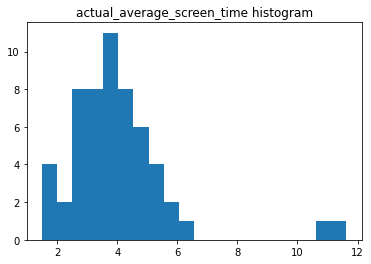

In [5]:
## Case 1 Problem B code and graph
screen_time = list(df["actual_average_screen_time"])
screen_time = [time for time in screen_time if time != -1.0]

def plot_histogram(arr, bins, title):
    plt.hist(arr, bins = bins)
    plt.title(title)
    plt.show()

plot_histogram(screen_time, 20 ,title = "actual_average_screen_time histogram")

There are  2  outliers


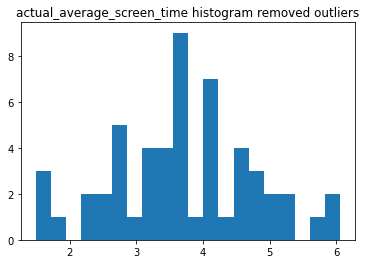

In [110]:
# B) a)
# Does it have outliers?If so, how many?
def remove_outlier_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final = df[(( df >= (Q1-1.5*IQR) ) & ( df <= (Q3+1.5*IQR)) )].dropna()
#     print(df_final)
    return df_final

screen_time_df = pd.DataFrame(screen_time)
removed_screen_time_df = remove_outlier_IQR(screen_time_df)
removed_screen_time = list(removed_screen_time_df[0])

outliers = len(screen_time) - len(removed_screen_time)
print("There are ", outliers, " outliers")

plot_histogram(removed_screen_time, 20, "actual_average_screen_time histogram removed outliers")


-0.03229222919154047


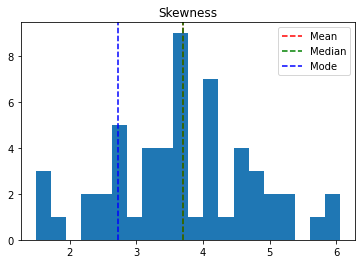

In [9]:
# Skew



def skew_plot(df, bins = 20):
    mean = df[0].mean()
    median = df[0].median()
    mode = df[0].mode().values[0]
    arr = list(df[0])
    
    plt.hist(arr, bins = bins)
    print(df.skew().values[0])
    plt.axvline(mean, color='r', linestyle='--')
    plt.axvline(median, color='g', linestyle='--')
    plt.axvline(mode, color='b', linestyle='--')
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
    plt.title("Skewness")
    plt.show()
    
    
skew_plot(removed_screen_time_df)


#### Writeup Answer to Problem B: 
 Does it have outliers?If so, how many?
 Is it skewed? If so, is it left skewed or right skewed? What’s the skewness? 
 
 1. Distribution: The histogram illustrates the distribution of average screen time without missing data (-1). It shows that most of the participants have about 4 hours on their screens.
 
 2. Outliers: There are 2 outliers.
 
 3. The distribution is fairly symmetrical. Because the skewness is -0.03229222919154047, not very large number. Just a little bit left skewed.
 

mean :  3.972857142857143  median :  3.715  random :  4.13


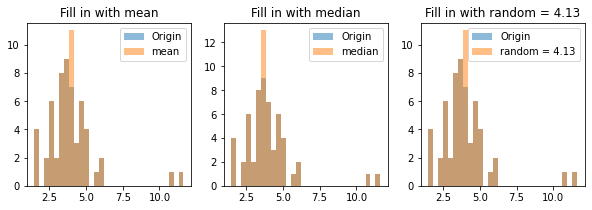

In [78]:
## Case 1 Problem C code and graph


raw_screen_time_df = df[["actual_average_screen_time"]]
raw_screen_time_df = raw_screen_time_df.replace(-1.0, np.nan)

def get_num():
    mean = raw_screen_time_df["actual_average_screen_time"].mean()
    median = raw_screen_time_df["actual_average_screen_time"].median()
    random = screen_time_df[0].sample().values[0]
    print("mean : ", mean, " median : ", median , " random : " , random)
    return { "mean": mean, "median":median , "random = " + str(random):random }

# fill in different values

def fill_in_num(num, df):
    df = df.fillna(num)
    arr = list(df["actual_average_screen_time"])
    return arr

def plot_3(df):
    nums = get_num()
    origin = list(df["actual_average_screen_time"])
    origin = [time for time in origin if time != -1.0]
    i = 1
    plt.figure(figsize = (10,3))
    for title, num in nums.items():
        plt.subplot(1,3,i)
        i += 1
        now = fill_in_num(num, df)
        plt.hist(origin, bins=30,  alpha = 0.5, label = "Origin")
        plt.hist(now, bins=30, alpha = 0.5, label = title)
        plt.legend()
        plt.title("Fill in with " + title)
    plt.show()
plot_3(raw_screen_time_df)

#### Writeup Answer to Problem C: 
How did you choose the random value from method 3)? 

- Because the original array contains -1.0 and NaN, so I choose the random value from the list which has already dropped these missing values.

How do the distributions look like after you implement the three filling methods? (Compare them)

- The figure above overlays the three different methods on the original one individually.

- Mean: The bin count around mean value will rise up a lot.
- Median: The bin count around median will rise up a lot.
- Random: The bin count around random value will rise up a lot.


In [100]:
## Case 1 Problem D code and graph
from scipy.stats import ttest_ind



def t_test(df):
    mean = 3.75
    std = 1.25
    samples = np.random.normal(mean, std, df.shape[0])
    nums = get_num()
    for title, num in nums.items():
        now = fill_in_num(num, df)
        _ , p = ttest_ind(now, samples)
        print(title + " : ", p)
        
    
t_test(raw_screen_time_df)

mean :  3.972857142857143  median :  3.715  random :  4.22
mean :  0.8967886176392907
median :  0.9497352755442221
random = 4.22 :  0.8465708370218106


#### Answer to Problem D: 
Report the three p-values. Which one of the filling methods reconstruct this feature to be closest to the research distribution? Why do you think this is the case?

- ANS:
mean :  0.8967886176392907
median :  0.9497352755442221
random = 4.22 :  0.8465708370218106
- In this case, the median filling is the most powerful method to portrate the distribution of the real world screen time. Because the greater p value get, the greater chance that this case will happen in real world.

### Case 2: Perceived average screen time

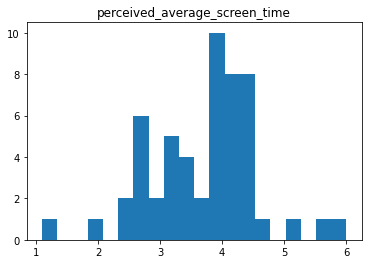

In [103]:
## Case 2 Problem A code and histogram
perceived_time = df["perceived_average_screen_time"]
perceived_time = [time for time in perceived_time if time != -1.0]
plot_histogram(perceived_time, 20, "perceived_average_screen_time")

Outliers :  2
-0.11839534824092446


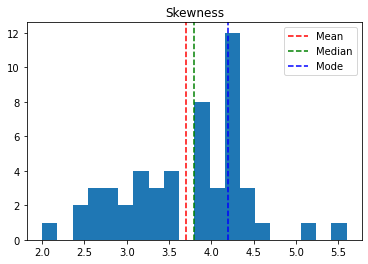

In [111]:
# outliers
perceived_time_df = pd.DataFrame(perceived_time)
removed_perceived_time_df = remove_outlier_IQR(perceived_time_df)
removed_perceived_time = list(removed_perceived_time_df[0])
outliers = len(perceived_time) - len(removed_perceived_time)
print("Outliers : " , outliers)
# plot_histogram(removed_perceived_time, 20, "perceived_average_screen_time")


# Skewness
skew_plot(removed_perceived_time_df)

#### Writeup Answer to Problem B: 
 Does it have outliers?If so, how many? 
 Is it skewed? If so, is it left skewed or right skewed? What’s the skewness? 
 - No outliers
 - Not Skewed. The skewness is -0.11839534824092446 which is within (-0.5,0). This means that the distribution is fairly symmetrical.


In [136]:
## Case 2 Problem B code
screen_time_df = df[["actual_average_screen_time"]]
screen_time_df = screen_time_df.replace(-1.0 , np.nan)
mean, std = screen_time_df["actual_average_screen_time"].mean(), screen_time_df["actual_average_screen_time"].std()
print("mean : ", mean , " std : " , std)
intense_user_time = screen_time_df[( screen_time_df["actual_average_screen_time"] > mean + std )]
print(intense_user_time)

mean :  3.972857142857143  std :  1.7595802332950317
    actual_average_screen_time
15                       10.78
32                        6.06
44                       11.63
45                        5.94


How many of them are intense phone users?
- ANS: There are 4 intense phone users

In [137]:
## Case 2 Problem C code and graph

#  A) missing perceived_average_screen_time
missing_perceived_time = df[["perceived_average_screen_time"]]
missing_perceived_time = pd.DataFrame(missing_perceived_time["perceived_average_screen_time"] == -1.0)
# print(missing_perceived_time)

# B)
intense_df = pd.DataFrame(screen_time_df["actual_average_screen_time"] > mean + std)
# print(intense_df)

from scipy.stats import chi2_contingency
contigency= pd.crosstab(missing_perceived_time["perceived_average_screen_time"], intense_df["actual_average_screen_time"])
c, p, dof, expected = chi2_contingency(contigency)

print("p : ", p)

p :  0.09572766187792268


What is the p-value? Do you think they are correlated? What does this mean? Do you think this feature is MAR or MNAR? 

- P value: 0.09572766187792268
- I think they may be correlated. Because when P value is larger than 0.05, the null hypothesis should not be rejected.
- I think this feature is MNAR(missing not at Random).

### Case 3: Location

In [148]:
df.head()

,uuid,age,gender,system,hours_in_study,perceived_average_screen_time,actual_average_screen_time
0,3600D531-0C55-44A7-AE95-A7A38519464E,24,male,Android,86,4.3,5.18
1,59EEFAE0-DEB0-4FFF-9250-54D2A03D0CF2,31,female,Android,125,4.2,2.31
2,CF722AA9-2533-4E51-9FEB-9EAC84EE9AAC,37,male,iOS,60,3.9,-1.00
3,5152A2DF-FAF3-4BA8-9CA9-E66B32671A53,22,male,iOS,110,-1.0,4.75
4,136562B6-95B2-483D-88DC-065F28409FD2,19,male,Android,103,1.1,1.55


In [161]:
print(sensor["3600D531-0C55-44A7-AE95-A7A38519464E"].head(1))

   location:raw_latitude  location:raw_longitude  raw_acc:3d:mean_x  \
0              32.882483             -117.234601           0.022972   

   raw_acc:3d:mean_y  raw_acc:3d:mean_z  discrete:app_state:is_active  \
0          -0.002678          -1.002311                           0.0   

   discrete:app_state:is_inactive  discrete:app_state:is_background  \
0                             1.0                               0.0   

   discrete:app_state:missing  lf_measurements:battery_level  
0                         0.0                           0.49  


In [189]:
## Case 3 Problem A code (graph)

import math

def identify_user(user):
    # dataframe
    # location:raw_latitude
    user = user[["location:raw_latitude", "lf_measurements:battery_level"]]
    user = user.values.tolist()
    # identify behavior
    for i in range(len(user) - 1):
        if not math.isnan(user[i][0]) and user[i][1] >= 0.15 and math.isnan(user[i+1][0]) and user[i+1][1] < 0.15:
            return True
    return False

turn_off_user = [user_id for user_id, user in sensor.items() if identify_user(user)]
print(turn_off_user)
print("There are " + str(len(turn_off_user)) + " users who turn off their location due to low battery.")


['3600D531-0C55-44A7-AE95-A7A38519464E', '59EEFAE0-DEB0-4FFF-9250-54D2A03D0CF2', '81536B0A-8DBF-4D8A-AC24-9543E2E4C8E0', '40E170A7-607B-4578-AF04-F021C3B0384A', '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842', '33A85C34-CFE4-4732-9E73-0A7AC861B27A']
There are 6 users who turn off their location due to low battery.


In [197]:
# How many minitues?

def minutes(user):
    user = user[["location:raw_latitude", "lf_measurements:battery_level"]]
    user = user.values.tolist()
    start = 0
    end = len(user)
    minute = 0
    for i in range(len(user) - 1):
        if start != 0 and not math.isnan(user[i][0]):
            end = i
            start = 0
            minute += end - start
        if not math.isnan(user[i][0]) and user[i][1] >= 0.15 and math.isnan(user[i+1][0]) and user[i+1][1] < 0.15:
            start = i
        
    return end - start

# print(sensor["81536B0A-8DBF-4D8A-AC24-9543E2E4C8E0"])

for user_id in turn_off_user:
    user = sensor[user_id]
    print("For user : ", user_id)
    print("Lost minutes: ", minutes(user))


For user :  3600D531-0C55-44A7-AE95-A7A38519464E
Lost minutes:  386
For user :  59EEFAE0-DEB0-4FFF-9250-54D2A03D0CF2
Lost minutes:  304
For user :  81536B0A-8DBF-4D8A-AC24-9543E2E4C8E0
Lost minutes:  3116
For user :  40E170A7-607B-4578-AF04-F021C3B0384A
Lost minutes:  868
For user :  1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842
Lost minutes:  2031
For user :  33A85C34-CFE4-4732-9E73-0A7AC861B27A
Lost minutes:  1784


explanation of implementation

- Identification: I identified these users' behaviors by following the time sequences. If in time `i` the user's location is not `nan` and battery isn't below `0.15` and in time `i+1` the user's location is `nan` and battery is below `0.15`, this means that user may perform the behavior.
- There will be 6 people who did this.
- Minutes lost information is displayed above: I calculated by set the behavior as the start time and if the location keeps unavailible then count this kind of time.


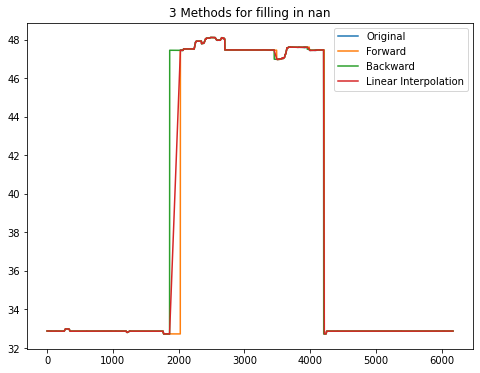

In [203]:
## Case 3 Problem B code and graph
user_now = sensor["F50235E0-DD67-4F2A-B00B-1F31ADA998B9"]
user_now = user["location:raw_latitude"]

user_forward = user_now.fillna(method = "ffill")
user_backward = user_now.fillna(method = "bfill")
user_linear = user_now.interpolate()

plt.figure(figsize = (8,6))
plt.plot(user_now, label = "Original")
plt.plot(user_forward, label = "Forward")
plt.plot(user_backward, label = "Backward")
plt.plot(user_linear, label = "Linear Interpolation")
plt.title("3 Methods for filling in nan")
plt.legend()
plt.show()


Compare the 4 traces. What do you see? If you were to use this dataset for further analysis, which filling method will you choose? 

- Discovery: There exisits slight difference in the gap between high and low platforms that happens in latitudes. This phenomenom is mostly clear around 2000 time stamps.
- I would like to user linear interpolation method. Because when the location is lost, it doesn't mean that the user disappear at one place and reappear at another place where latitude is 15 higher than one night before. Thus, the users must have moved in between when the location data is missing. Linear interpolation is the best way to portrate this kind of movement that imagines that the users is moving at a certain speed.